In [1]:
from numpy import load
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import PIL
from sklearn.model_selection import train_test_split 

In [2]:
data = load('data/face_images.npz')
lst = data.files

face_images = data["face_images"]
face_images.shape

face_landmarks = pd.read_csv("data/facial_keypoints.csv")


In [3]:
face_images = face_images.T

In [4]:
face_images[0]

array([[238., 235., 237., ..., 186., 189., 191.],
       [236., 238., 236., ..., 183., 188., 184.],
       [237., 236., 237., ..., 181., 207., 184.],
       ...,
       [250., 249., 251., ...,  52.,  61.,  70.],
       [250., 250., 251., ...,  57.,  69.,  75.],
       [250., 251., 250., ...,  60.,  78.,  90.]])

In [5]:
face_landmarks

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447


In [6]:
face_landmarks = face_landmarks.dropna()

In [7]:
idx = face_landmarks.index.tolist()
face_images = face_images[idx]
face_images.shape

(2140, 96, 96)

In [8]:
face_landmarks = face_landmarks.values
face_landmarks.shape

(2140, 30)

In [9]:
face_images = np.array(list(map(lambda x:np.array(PIL.Image.fromarray(x).rotate(-90, PIL.Image.NEAREST, expand = 1)).reshape((96,96,1))/255 ,face_images)))

C:\Users\hosma\AppData\Local\Temp\ipykernel_6100\2080670349.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  face_images = np.array(list(map(lambda x:np.array(PIL.Image.fromarray(x).rotate(-90, PIL.Image.NEAREST, expand = 1)).reshape((96,96,1))/255 ,face_images)))


In [10]:
def landmarkRegoup(landmark):
    
    temp_landmark = []
    for k in range(0,len(landmark) - 2 ,2):
       
        temp_landmark.append([landmark[k],landmark[k+1]])
    return temp_landmark    

In [11]:
from PIL import Image, ImageDraw

def drawLandmarks(image,imageLandmarks):
    image = PIL.Image.fromarray(np.squeeze(image)*255)
    image = image.convert('RGB')
    draw = ImageDraw.Draw(image)
    
    for landmark in landmarkRegoup(imageLandmarks):
  
        draw.point((landmark[0], landmark[1]) ,'red')
  
    return image

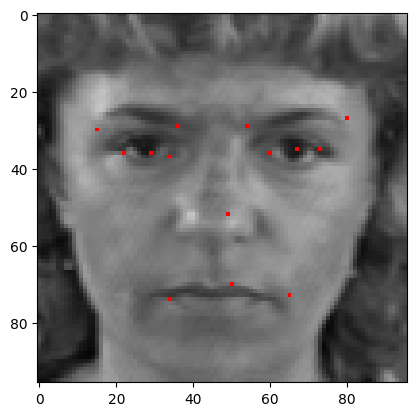

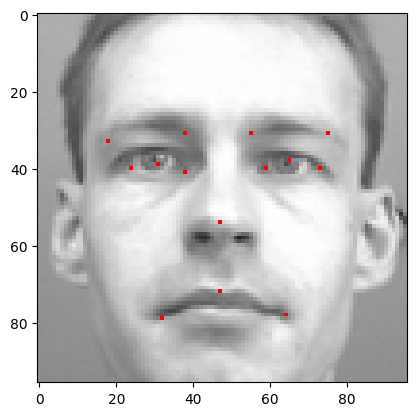

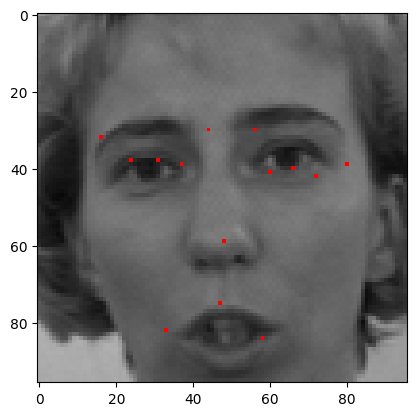

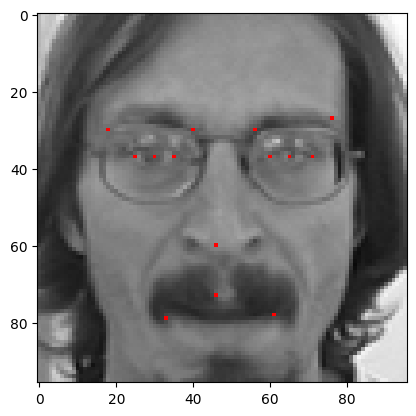

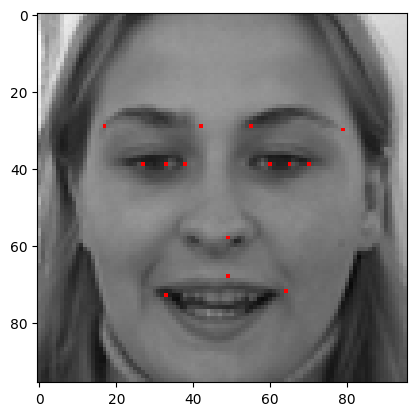

In [12]:
for image,imageLandmarks in zip(face_images[45:50],face_landmarks[45:50]):    
    
    plt.imshow(drawLandmarks(image,imageLandmarks))
    plt.show()  

Create Model 

In [13]:
import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Input,Add,Concatenate,Softmax,GlobalAveragePooling2D,SpatialDropout2D,BatchNormalization
from keras.models import Sequential,Model


In [14]:
model = Sequential()
model.add(Input(shape=(96,96,1)))

model.add(Conv2D(16,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(Conv2D(32,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),padding="same",kernel_initializer="he_normal"))
model.add(MaxPooling2D())
model.add(SpatialDropout2D(0.25))
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dense(256,activation="relu",kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dense(128,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(units = 64 ,activation="relu",kernel_initializer="he_normal"))
model.add(BatchNormalization())

model.add(Dense(30, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse' ,metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 spatial_dropout2d (SpatialD  (None, 24, 24, 64)       0

In [15]:
face_images.shape,face_landmarks.shape

((2140, 96, 96, 1), (2140, 30))

In [16]:

def data_generator(trainX,trainY,num_images_per_batch):
    
    X, y = [], []

    n = 0

    while True:

        for i in range(len(trainY[0])):
            n +=1

            image = trainX[i]

            landmarks = trainY[i]

          
          
                
            X.append(image)
                   
            y.append(landmarks/96)
         

            if n==num_images_per_batch:
                u = np.array(X)
                w = np.array(y)
            
             
               
                yield(u,w)
                
                X,  y = [], []
                n = 0



In [17]:

trainX,testX,trainY,testY = train_test_split(face_images,face_landmarks,test_size=0.2)
trainX,valX,trainY,valY = train_test_split(trainX,trainY,test_size=0.2)

In [18]:
#,validation_data=val_generator
batch_size = 50
steps = trainX.shape[0]//batch_size
val_steps = valY.shape[0]//batch_size
epoch = 50

for i in range(1):
    train_generator = data_generator(trainX,trainY,batch_size)
    val_generator = data_generator(valX,valY,batch_size)
    model.fit(train_generator,validation_data=val_generator,validation_steps= val_steps,epochs=10,steps_per_epoch=steps,verbose=1)

    model.save("./model_weights/model_"+str(i)+".h5")
    print("./model_weights/model_"+str(i)+".h5 kaydedildi")

Epoch 1/10
27/27 [==============================] - 11s 48ms/step - loss: 0.0691 - accuracy: 0.0311 - val_loss: 0.0567 - val_accuracy: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 1s 38ms/step - loss: 0.0425 - accuracy: 0.0489 - val_loss: 0.0301 - val_accuracy: 0.1667
Epoch 3/10
27/27 [==============================] - 1s 38ms/step - loss: 0.0241 - accuracy: 0.1074 - val_loss: 0.0156 - val_accuracy: 0.0667
Epoch 4/10
27/27 [==============================] - 1s 38ms/step - loss: 0.0110 - accuracy: 0.1378 - val_loss: 0.0047 - val_accuracy: 0.4333
Epoch 5/10
27/27 [==============================] - 1s 38ms/step - loss: 0.0039 - accuracy: 0.1267 - val_loss: 0.0023 - val_accuracy: 0.5000
Epoch 6/10
27/27 [==============================] - 1s 37ms/step - loss: 0.0015 - accuracy: 0.2837 - val_loss: 0.0018 - val_accuracy: 0.5000
Epoch 7/10
27/27 [==============================] - 1s 37ms/step - loss: 8.6376e-04 - accuracy: 0.6096 - val_loss: 0.0017 - val_accuracy: 0.6000
Epoc

In [19]:
score = model.evaluate(testX, testY, verbose = 1) 

14/14 [==============================] - 1s 17ms/step - loss: 2568.2959 - accuracy: 0.6869


1/1 [==============================] - 0s 269ms/step


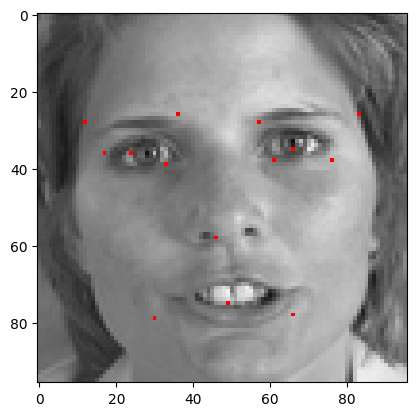

1/1 [==============================] - 0s 27ms/step


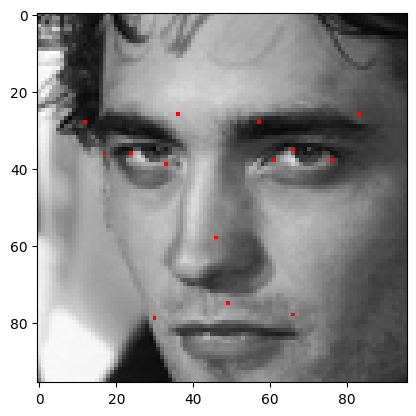

1/1 [==============================] - 0s 30ms/step


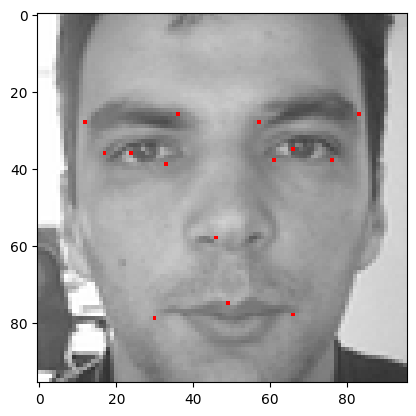

1/1 [==============================] - 0s 27ms/step


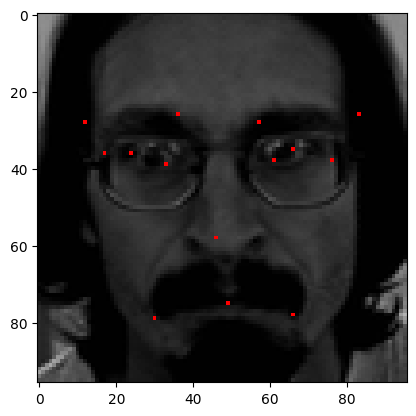

1/1 [==============================] - 0s 29ms/step


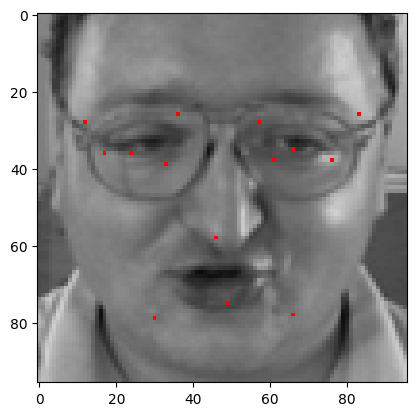

In [20]:

for i in range(5):  
    plt.imshow(drawLandmarks(testX[i].reshape((96,96)),np.squeeze(model.predict(np.expand_dims(testX[0],axis=0))*96)))
    plt.show()  